# Paso 1: Entendimiento del problema

Queremos predecir las ventas de videojuegos en América del Norte (`NA_Sales`) a partir de otras variables como año, plataforma, género, y ventas en otras regiones. Esta predicción puede ayudar a las compañías a tomar decisiones sobre dónde lanzar o promocionar sus productos.

# Paso 2: Carga del dataset

In [276]:
df = pd.read_csv("F:\Bootcamp\project_break_2\Project_Break_2\\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [278]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [279]:
df[df["Year"].isna() & df["Publisher"].isna()].count()

Rank            22
Name            22
Platform        22
Year             0
Genre           22
Publisher        0
NA_Sales        22
EU_Sales        22
JP_Sales        22
Other_Sales     22
Global_Sales    22
dtype: int64

# Paso 3: Análisis exploratorio (EDA)

La cantidad de nulos no es altamente significativa y ademas no conviene usar datos sinteticos.

In [280]:
df.dropna(inplace = True)

In [281]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

primero visalizaremos cuales son las plataformas con mas impacto

In [282]:
df.Platform.value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [283]:
platform_sales_series = df.groupby("Platform").Global_Sales.mean().sort_values(ascending = False)

# Paso 4: Preprocesamiento

In [284]:
print(platform_sales_series)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.785737
2600    0.746293
PS3     0.728029
Wii     0.705279
N64     0.690538
XOne    0.662254
PS      0.611766
PS2     0.579906
WiiU    0.572448
3DS     0.493527
GBA     0.388830
DS      0.384284
GC      0.363727
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.271535
PSP     0.243701
WS      0.236667
SAT     0.194162
PSV     0.150244
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64


Text(0.5, 1.0, 'top 5 plataforms by total sales')

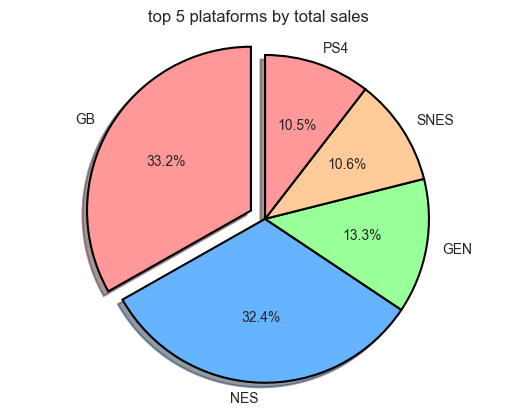

In [285]:

plt.pie(platform_sales_series.head(),
        labels = platform_sales_series.head().index,
        autopct= "%1.1f%%",
        colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"],
        explode = (0.1, 0, 0,0,0),
        shadow = True,
        startangle = 90,
        wedgeprops= {"edgecolor":"black", "linewidth" : 1.5 }) 
plt.axis("equal")
plt.title("top 5 plataforms by total sales")

C:\Users\samas\AppData\Local\Temp\ipykernel_25424\4098111200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=platform_sales_series.head().index,


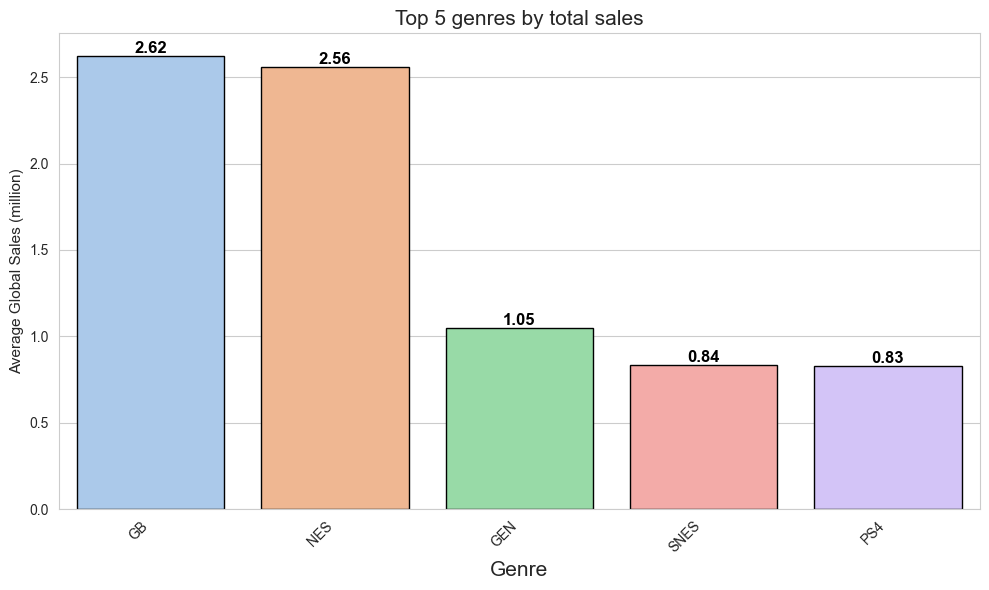

In [286]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=platform_sales_series.head().index,
                 y=platform_sales_series.head().values,
                 palette = "pastel",
                 edgecolor = "black")
plt.title("Top 5 genres by total sales", fontdict={'fontsize': 15})
plt.xlabel("Genre", fontdict={'fontsize': 15})
plt.ylabel("Average Global Sales (million)", fontdict={'fontsize': 11})

plt.xticks(rotation = 45 , ha="right")
plt.tight_layout()
for x in ax.patches:
    ax.annotate(f'{x.get_height():.2f}',
                (x.get_x() + x.get_width() / 2., x.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='black')

C:\Users\samas\AppData\Local\Temp\ipykernel_25424\3432312032.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=best_publisher_region.index,


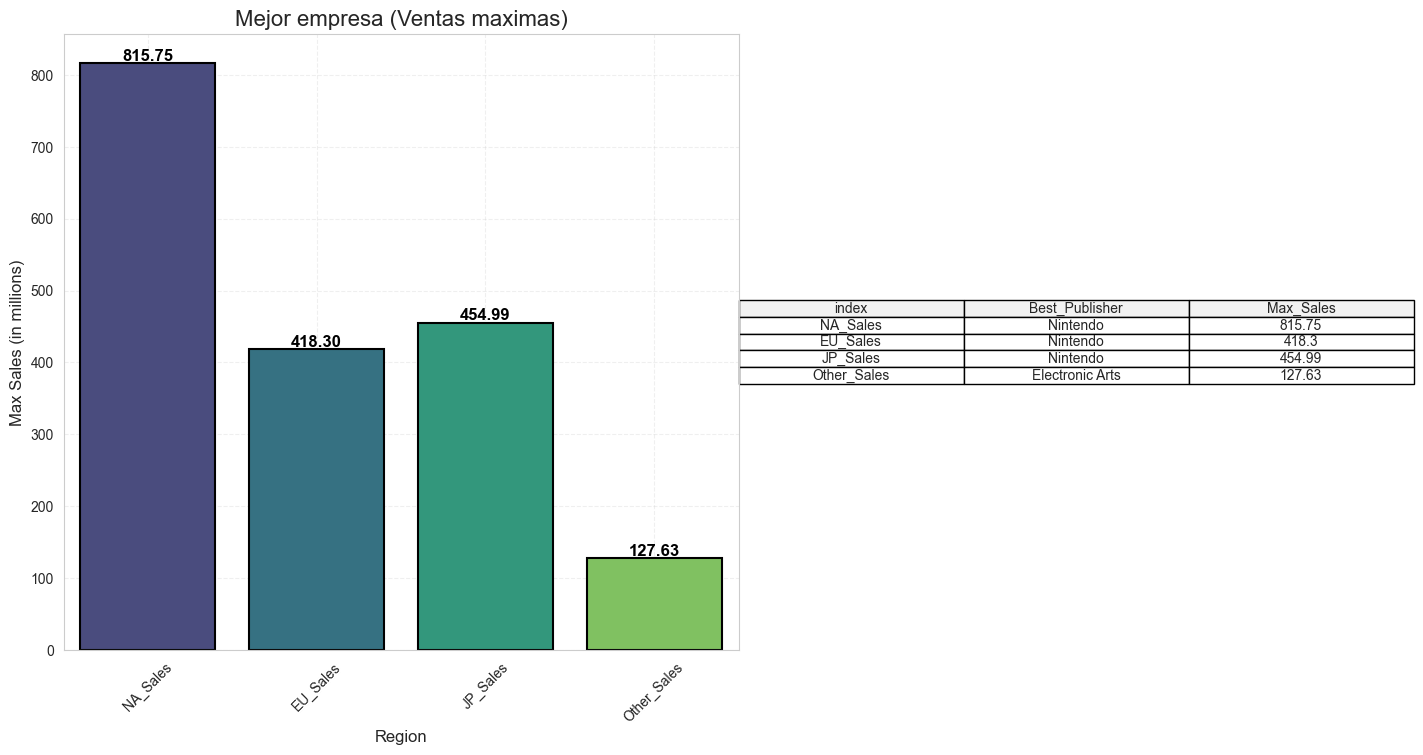

In [287]:
df_publishers_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()
best_publishers_series = df_publishers_sales.idxmax()
best_sales_values = df_publishers_sales.max()

best_publisher_region = pd.DataFrame({
    'Best_Publisher': best_publishers_series,
    'Max_Sales': best_sales_values
})



plt.figure(figsize=(10, 8))

ax = sns.barplot(x=best_publisher_region.index, 
            y=best_publisher_region.Max_Sales, 
            palette="viridis",  
            edgecolor='black',  
            linewidth=1.5)


plt.title("Mejor empresa (Ventas maximas)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Max Sales (in millions)", fontsize=12)
plt.xticks(rotation=45)



table_data = best_publisher_region[['Best_Publisher', 'Max_Sales']].reset_index()



plt.table(cellText=table_data.values,
          colLabels=table_data.columns,
          cellLoc='center', loc='right', colColours=['#f2f2f2']*len(table_data.columns))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', 
                color='black')

plt.subplots_adjust(right=0.8)  



plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

comprobamos si la diferencia entro los 2 proncipales competidores es significativa:

In [288]:
succesful_publishers = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).index.to_list()

succesful_publishers2 =  succesful_publishers[0:2]
publisher1 = df[df['Publisher'] == succesful_publishers2[0]].Global_Sales
publisher2 = df[df['Publisher'] == succesful_publishers2[1]].Global_Sales


publisher1 = publisher1.dropna()
publisher2 = publisher2.dropna()

threshold = 0.05


tstat1, pval1 = st.shapiro(publisher1)
tstat2, pval2 = st.shapiro(publisher2)


if pval1 <= threshold and pval2 <= threshold:
    t_test_answer = True
else:
    t_test_answer = False
    print('You can\'t apply Two sample t-test')

if t_test_answer:
    
    t_stat, p_value = st.ttest_ind(publisher1, publisher2)
    if p_value <= threshold:
        answer = 'Significante'
    else:
        answer = 'Insignificante'
    print(f'La diferencia entre los 2 vendedores principales[{succesful_publishers[0]} vs {succesful_publishers[1]}] se considera : {answer}.')

La diferencia entre los 2 vendedores principales[Nintendo vs Electronic Arts] se considera : Significante.


C:\Users\samas\AppData\Local\Temp\ipykernel_25424\3560500851.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_time_sales = df.groupby(['time_periods','Genre']).Global_Sales.sum().reset_index()


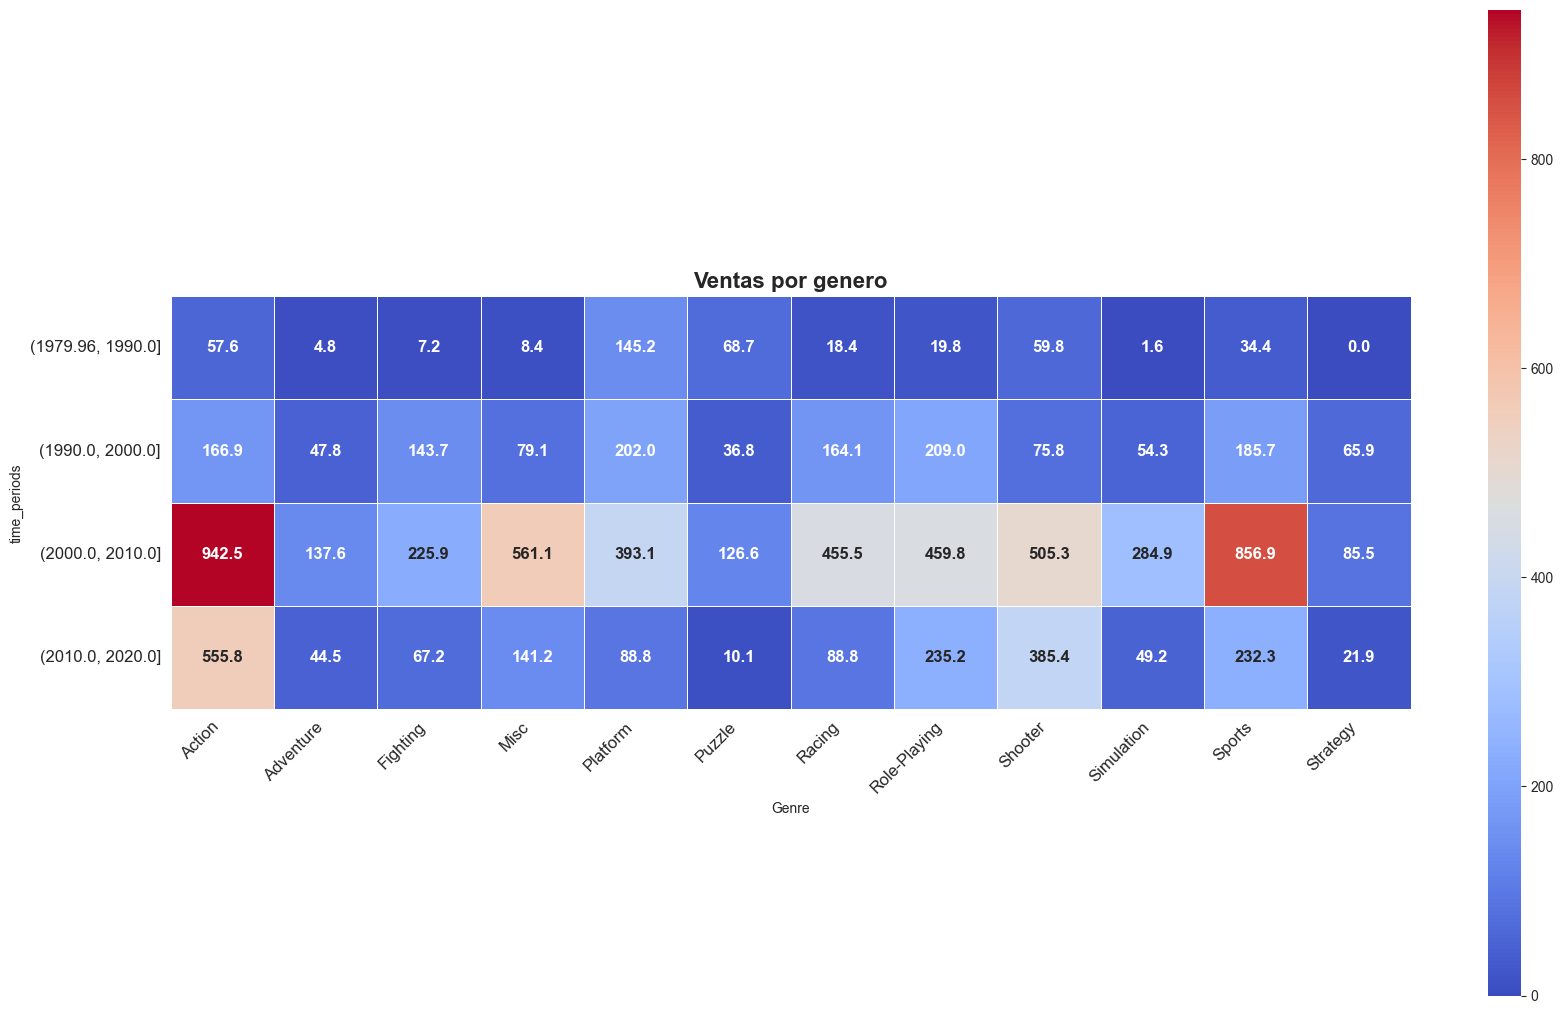

In [289]:
df['time_periods'] = pd.cut(df.Year, bins = 4)

df_time_sales = df.groupby(['time_periods','Genre']).Global_Sales.sum().reset_index()

df_time_sales = df_time_sales.pivot(
    index='time_periods', 
    columns='Genre', 
    values='Global_Sales')

plt.figure(figsize=(20, 16))  

sns.heatmap(df_time_sales, 
            cmap='coolwarm',  
            linewidths=0.5,  
            annot=True,  
            fmt=".1f",  
            annot_kws={"size": 12, "weight": "bold"},  
            cbar_kws={'shrink': 0.8, 'aspect': 30},  
            square=True)  


plt.title("Ventas por genero", fontsize=16, fontweight="bold")


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()

C:\Users\samas\AppData\Local\Temp\ipykernel_25424\1559877276.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_global_sales_population.columns,


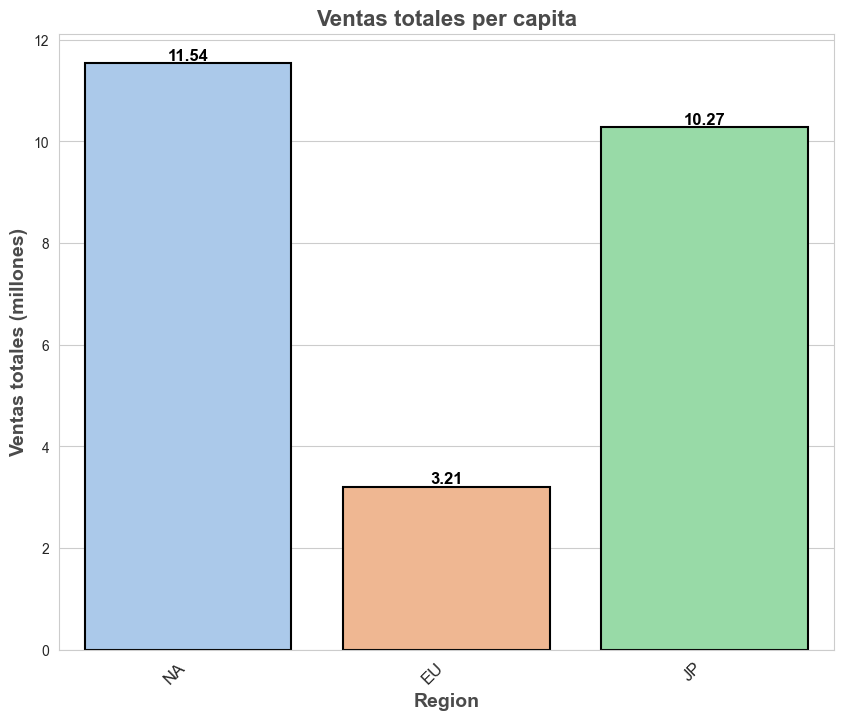

In [290]:
# Population (in millions) per Region:
NA_Population = 375
EU_Population = 750 
JP_Population = 125 

df_global_sales_population = pd.DataFrame()
df_global_sales_population['NA'] = df['NA_Sales'] /  NA_Population
df_global_sales_population['EU'] = df['EU_Sales'] /  EU_Population
df_global_sales_population['JP'] = df['JP_Sales'] /  JP_Population

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")


ax = sns.barplot(x=df_global_sales_population.columns, 
                 y=df_global_sales_population.sum(), 
                 palette='pastel', 
                 edgecolor='black',  
                 linewidth=1.5)


plt.title("Ventas totales per capita", fontsize=16, fontweight='bold', color='#4a4a4a')
plt.xlabel("Region", fontsize=14, fontweight='bold', color='#4a4a4a')
plt.ylabel("Ventas totales (millones)", fontsize=14, fontweight='bold', color='#4a4a4a')


plt.xticks(rotation=45, ha="right", fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', 
                color='black')


plt.show()

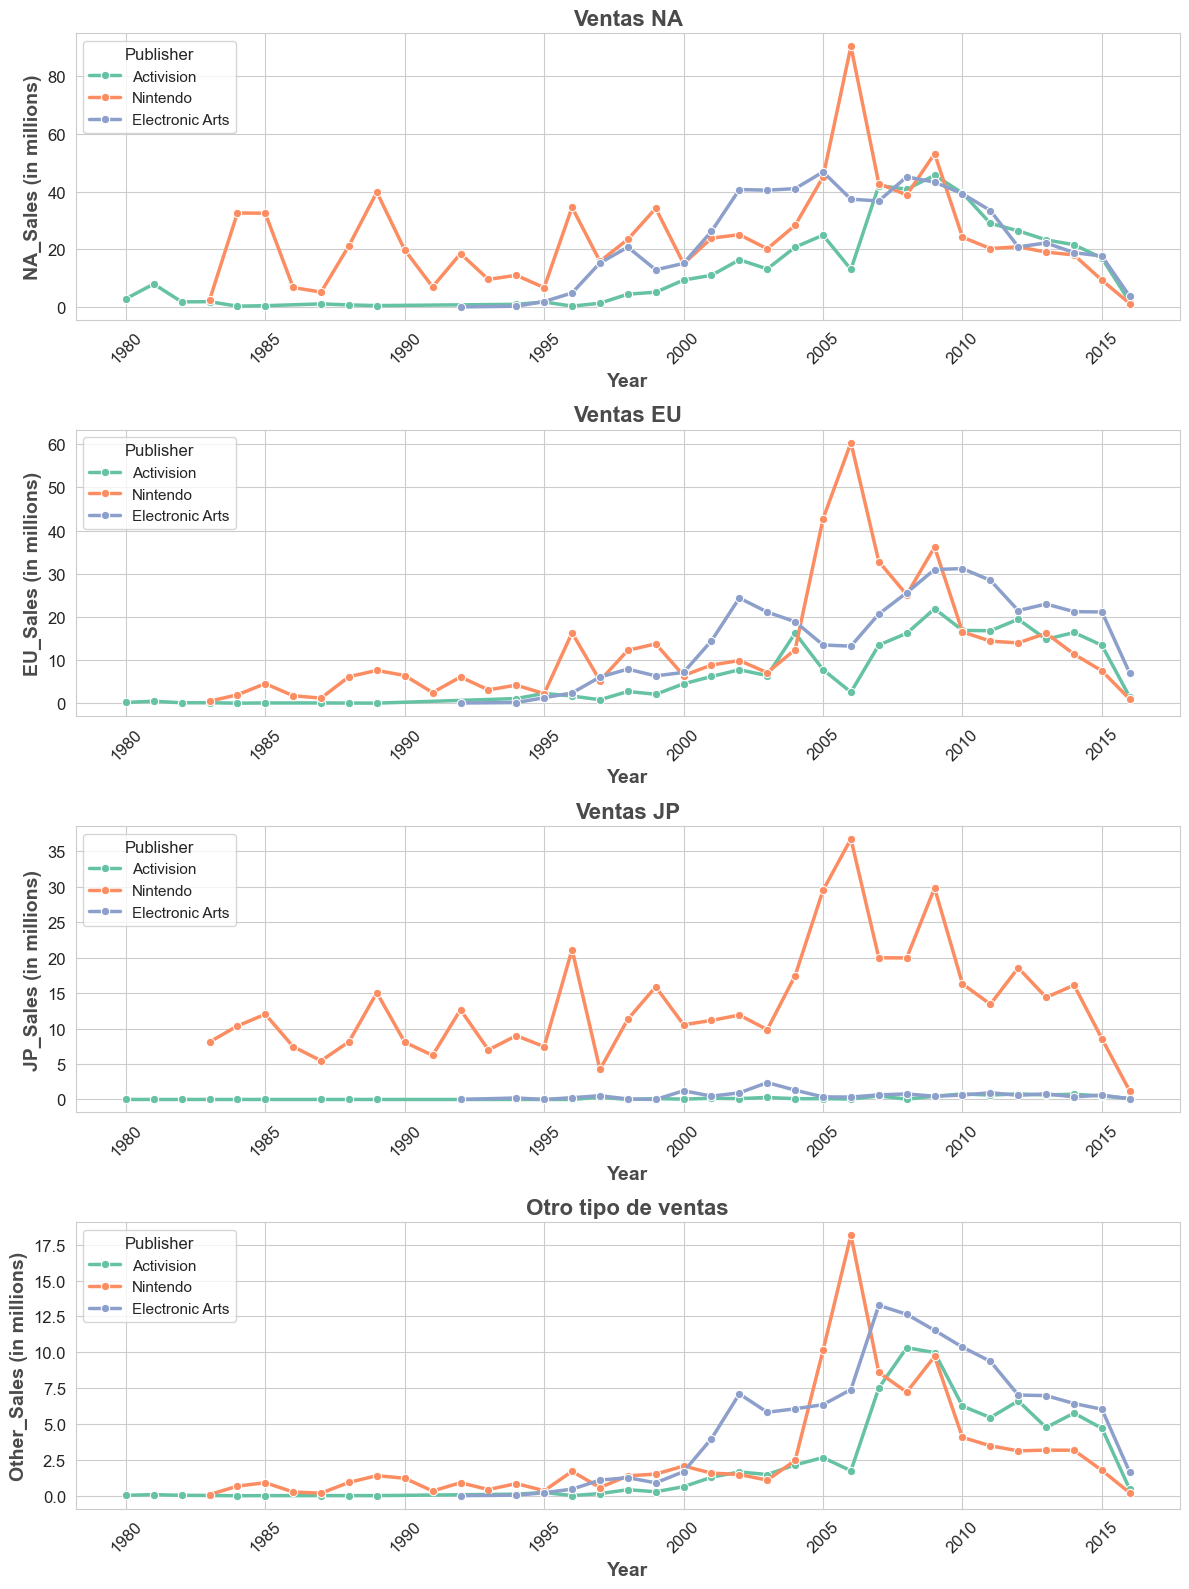

In [291]:
succesful_publishers3 = succesful_publishers[:3]


df_top3 = df[df['Publisher'].isin(succesful_publishers3)].groupby(['Year', 'Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()


sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
titles = ["Ventas NA", "Ventas EU", "Ventas JP", "Otro tipo de ventas"]


plt.figure(figsize=(12, 16))
sns.set_style("whitegrid")


for i, (col, title) in enumerate(zip(sales_columns, titles), start=1):
    plt.subplot(4, 1, i)
    
    sns.lineplot(x='Year', y=col, data=df_top3, hue='Publisher', 
                 marker='o', linewidth=2.5, palette='Set2')

    plt.title(title, fontsize=16, fontweight='bold', color='#4a4a4a')
    plt.xlabel("Year", fontsize=14, fontweight='bold', color='#4a4a4a')
    plt.ylabel(f"{col} (in millions)", fontsize=14, fontweight='bold', color='#4a4a4a')

    plt.legend(title="Publisher", title_fontsize=12, fontsize=11, loc='upper left', frameon=True)
    
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [292]:
df.columns
unnecessary_columns = ['Rank', 'Name', 'Global_Sales']
possible_y = ['NA_Sales']

X = df.drop(columns = unnecessary_columns +possible_y)
y = df['NA_Sales']
X

,Platform,Year,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,time_periods
0,Wii,2006.0,Sports,Nintendo,29.02,3.77,8.46,"(2000.0, 2010.0]"
1,NES,1985.0,Platform,Nintendo,3.58,6.81,0.77,"(1979.96, 1990.0]"
2,Wii,2008.0,Racing,Nintendo,12.88,3.79,3.31,"(2000.0, 2010.0]"
3,Wii,2009.0,Sports,Nintendo,11.01,3.28,2.96,"(2000.0, 2010.0]"
4,GB,1996.0,Role-Playing,Nintendo,8.89,10.22,1.00,"(1990.0, 2000.0]"
...,...,...,...,...,...,...,...,...
16593,GBA,2002.0,Platform,Kemco,0.00,0.00,0.00,"(2000.0, 2010.0]"
16594,GC,2003.0,Shooter,Infogrames,0.00,0.00,0.00,"(2000.0, 2010.0]"
16595,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,"(2000.0, 2010.0]"
16596,DS,2010.0,Puzzle,7G//AMES,0.01,0.00,0.00,"(2000.0, 2010.0]"


# Paso 5: Entrenamiento del modelo

In [293]:
categorical_features = ['Platform', 'Genre', 'Publisher']

quantitative_features = ['Year','EU_Sales','JP_Sales','Other_Sales']

unique_values = []
for column in categorical_features:
    unique_values.append(list(df[column].unique()))


In [294]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_quant = scaler.fit_transform(df[quantitative_features])
X_quant = pd.DataFrame(X_quant, columns=quantitative_features)

In [295]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_cat = encoder.fit_transform(df[categorical_features])
X_cat = pd.DataFrame(X_cat, columns=categorical_features)

In [296]:
X_processed = pd.concat([X_quant, X_cat], axis=1)
y = df['NA_Sales'] 

# Paso 6: Evaluación del modelo

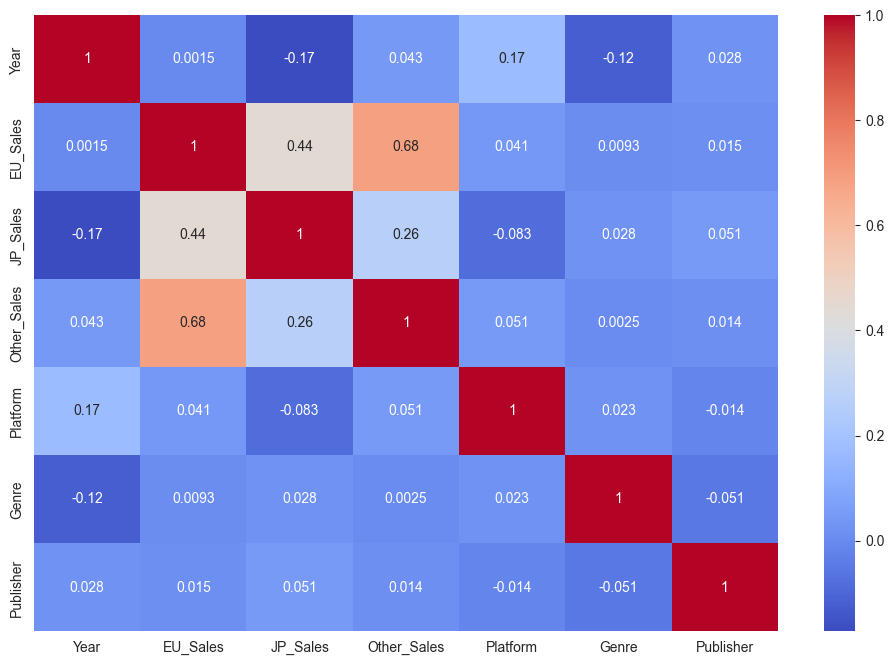

       Feature       P_value   Significance
0         Year  6.814801e-35    Significant
1     EU_Sales  0.000000e+00    Significant
2     JP_Sales  0.000000e+00    Significant
3  Other_Sales  0.000000e+00    Significant
4     Platform  3.848305e-04    Significant
5        Genre  2.046407e-01  Insignificant
6    Publisher  4.606098e-01  Insignificant


In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression

# Correlación
correlation_matrix = Xtrain.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# F-regression
f_values, p_values = f_regression(Xtrain, ytrain)
f_df = pd.DataFrame({'Feature': Xtrain.columns, 'P_value': p_values})
f_df['Significance'] = f_df['P_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Insignificant')
print(f_df)


# Paso 7: Validación cruzada y mejora del modelo

In [299]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor   
from sklearn.metrics import mean_squared_error

base_models = [
    ('KNN', KNeighborsRegressor(n_neighbors=1)),
    ('Linear', LinearRegression()),
    ('Tree', DecisionTreeRegressor(max_depth=None, min_samples_split=4))
]

stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

stacking.fit(Xtrain, ytrain)
ytrain_pred = stacking.predict(Xtrain)
ytest_pred = stacking.predict(Xtest)


In [301]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir modelos base
base_models = [
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('linear', LinearRegression()),
    ('tree', DecisionTreeRegressor(max_depth=10, min_samples_split=4))
]

# Meta-modelo robusto
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    cv=5
)

# Validación cruzada para evaluar el rendimiento general del stacking
scores = cross_val_score(stacking, X_processed, y, scoring='r2', cv=5)
print("CV R2 promedio:", scores.mean())
print("Todos los scores R2:", scores)

CV R2 promedio: -112.97574389801534
Todos los scores R2: [-3.20608638e-01 -7.77116259e+00 -1.51718393e+01 -1.70521274e+02
 -3.71093835e+02]


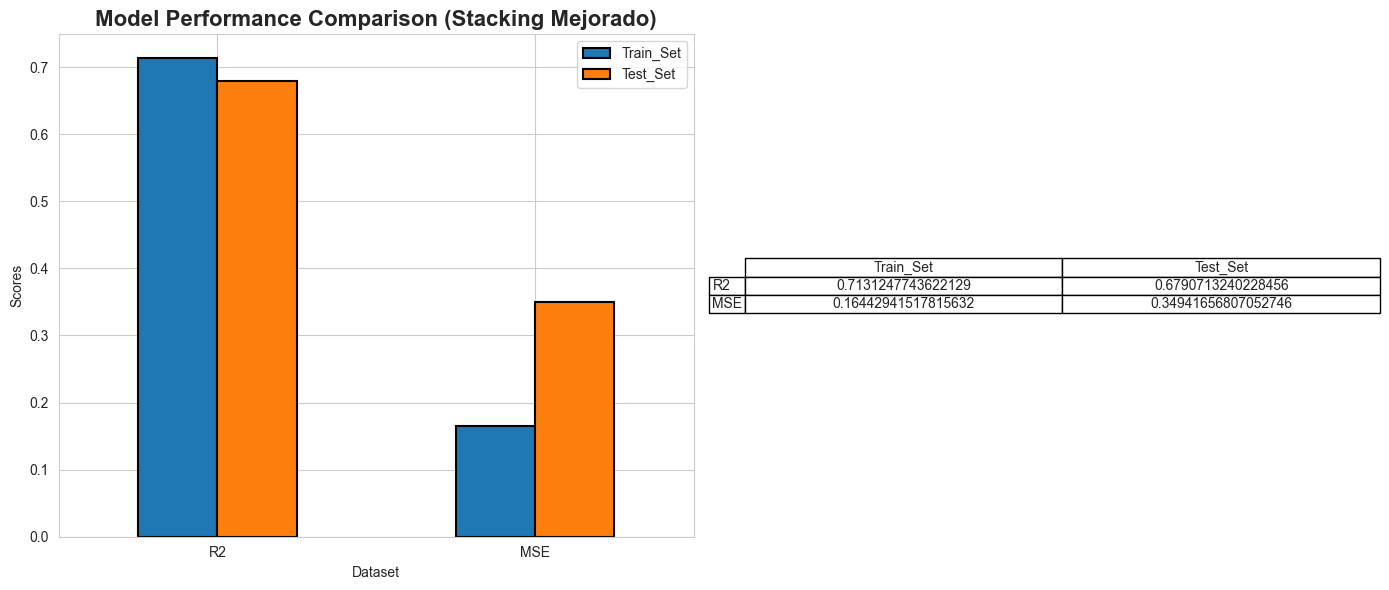

In [303]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Dataset ya preprocesado: X_processed, y
Xtrain, Xtest, ytrain, ytest = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Modelos base mejor configurados
base_models = [
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Linear', LinearRegression()),
    ('Tree', DecisionTreeRegressor(max_depth=10, min_samples_split=4))
]

# Meta-modelo más robusto
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    cv=5
)

# Entrenar
stacking.fit(Xtrain, ytrain)

# Predicciones
ytrain_pred = stacking.predict(Xtrain)
ytest_pred = stacking.predict(Xtest)

# Evaluación
from matplotlib import pyplot as plt
import pandas as pd

scores = {
    'Train_Set': {'R2': stacking.score(Xtrain, ytrain), 'MSE': mean_squared_error(ytrain, ytrain_pred)},
    'Test_Set': {'R2': stacking.score(Xtest, ytest), 'MSE': mean_squared_error(ytest, ytest_pred)}
}

df_scores = pd.DataFrame(scores)

# Visualización
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

df_scores.plot(kind='bar', ax=ax1, edgecolor='black', linewidth=1.5)
ax1.set_title('Model Performance Comparison (Stacking Mejorado)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Scores')
ax1.set_xlabel('Dataset')
ax1.set_xticklabels(df_scores.index, rotation=0)

ax2.axis('off')
ax2.table(
    cellText=df_scores.values,
    colLabels=df_scores.columns,
    rowLabels=df_scores.index,
    loc='center',
    cellLoc='center',
    colLoc='center',
    fontsize=12
)

plt.tight_layout()
plt.show()

# Paso 8: Guardado del modelo

In [ ]:
import joblib
joblib.dump(stacking, "src/models/modelo_final.pkl")
